In [1]:
# for data analysis
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn

In [2]:
# for visualizations
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# data extract, explore and understand
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info() # also observe the number of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [7]:
titanic.nunique() #no. of unique values in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### some questions
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc) <br>
2.) What deck were the passengers on and how does that relate to their class? <br>
3.) Where did the passengers come from? <br>
4.) Who was alone and who was with family? <br>
5.) What factors helped someone survive the sinking? <br>

### Q1: Who were the passengers on the Titanic based on gender or class or age?

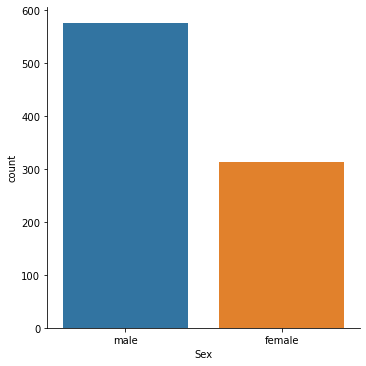

In [11]:
sns.catplot(x='Sex',data=titanic,kind='count')

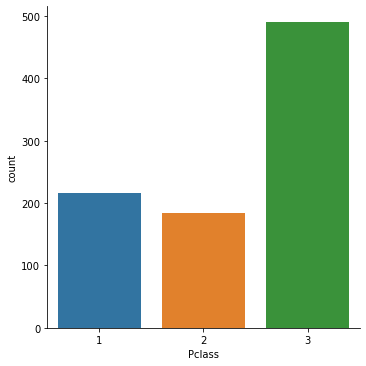

In [12]:
sns.catplot(x='Pclass',data=titanic,kind='count')

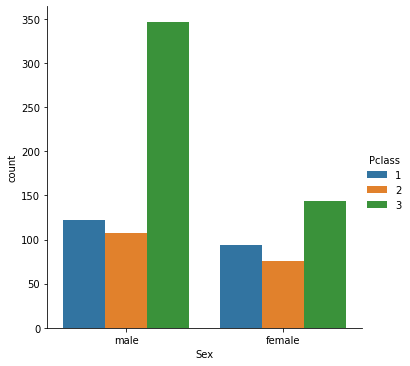

In [14]:
sns.catplot(x='Sex',data=titanic,hue='Pclass',kind='count')

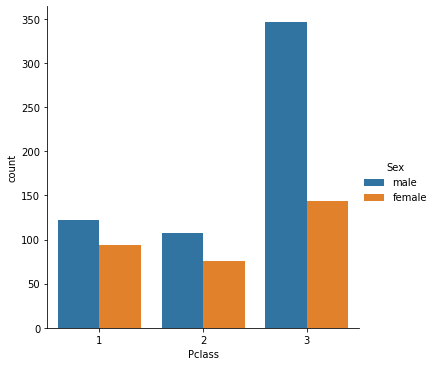

In [15]:
sns.catplot(x='Pclass',data=titanic,hue='Sex',kind='count')

In [20]:
# a function for creating a column consisting of male,female and child
def male_female_child(AgeSex):
    age,sex = AgeSex
    if age < 16:
        return 'Child'
    else:
        return sex
titanic['person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)
titanic
#axis=1 for unpacking across columns.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


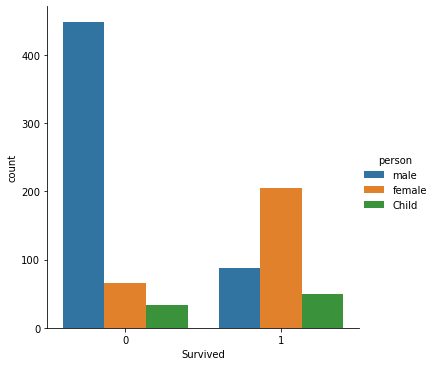

In [56]:
sns.catplot(x='Survived',data=titanic,hue='person',kind='count')

In [ ]:
# from the above we can observe that from the people who died most were male while female and children were comparitively less.
# more number of children survived than those who did not. The same goes with females.
# From the people who survived most were female. 
# This shows female and children were prioritized for saving.

<AxesSubplot:>

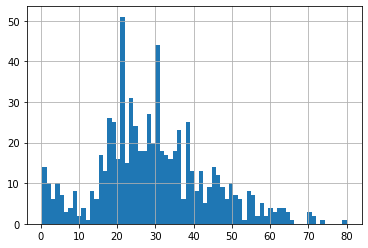

In [17]:
titanic['Age'].hist(bins=70) #numerical variable

In [18]:
titanic['Age'].mean() # most people lie around the age of 20 to 30.

29.69911764705882

In [21]:
titanic['person'].value_counts()

male      537
female    271
Child      83
Name: person, dtype: int64

The basic workflow is to initialize the FacetGrid object with the dataset
and the variables that are used to structure the grid. 
Then one or more plotting functions can be applied to each subset by calling FacetGrid.map(). 
Finally, the plot can be tweaked with other methods to do things like change the axis labels,
use different ticks, or add a legend

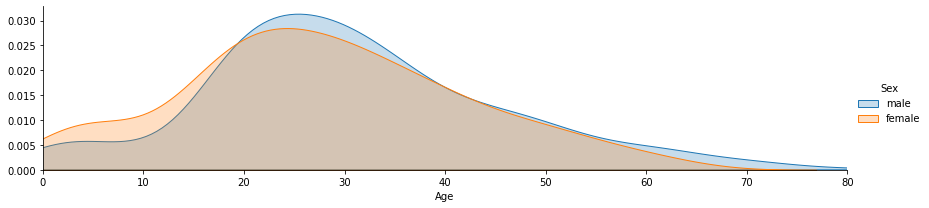

In [24]:
fig = sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,titanic['Age'].max()))
fig.add_legend()


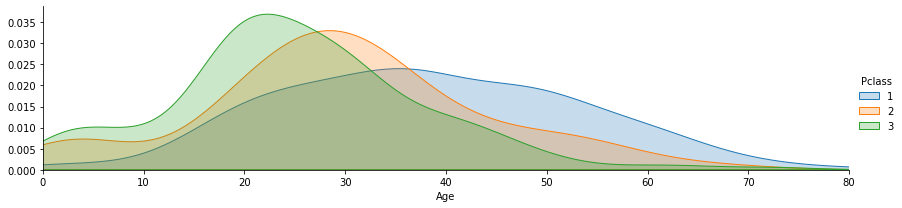

In [25]:
fig = sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,titanic['Age'].max()))
fig.add_legend()


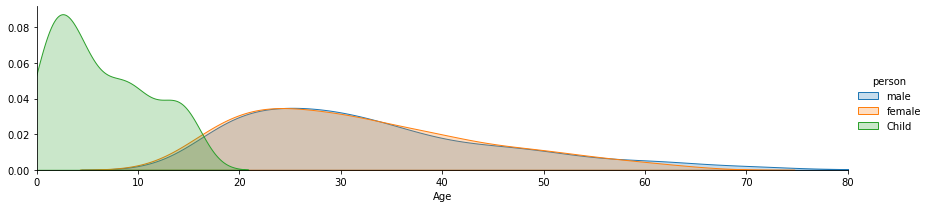

In [26]:
fig = sns.FacetGrid(titanic,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,titanic['Age'].max()))
fig.add_legend()


### Q2: What deck were the passengers on and how does that relate to their class?

In [55]:
# we can extract the deck information from the cabin and create a new column.
titanic['deck'] = [x[0] if isinstance(x,str) else np.nan for x in titanic['Cabin']]
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,NaN


In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  person       891 non-null    object 
 13  deck         204 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [57]:
#create a new dataframe by dropping the nan values in deck for plotting.
class_deck = titanic[['Pclass','deck']]
class_deck.head()

,Pclass,deck
0,3,NaN
1,1,C
2,3,NaN
3,1,C
4,3,NaN


In [58]:
class_deck.dropna(inplace=True)
class_deck.head()

<ipython-input-58-5aad074b4525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_deck.dropna(inplace=True)


,Pclass,deck
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C


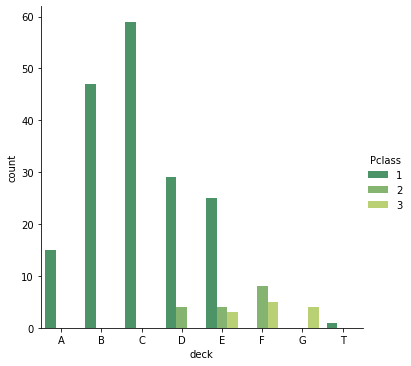

In [59]:
sns.catplot(x='deck',hue='Pclass',kind='count',data=class_deck,order=list('ABCDEFGT'),palette='summer')

In [60]:
# we can see from the above that passengers in 1st class occupied the decks A,B,C,D which may be the first class decks.
# D,E,F,G are occupied by 2nd and 3rd class passengers. T seems to be an error data so we can remove it
class_deck = class_deck[class_deck['deck']!='T']
class_deck.head()

,Pclass,deck
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C


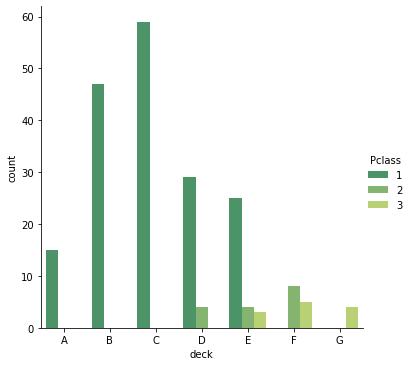

In [62]:
sns.catplot(x='deck',hue='Pclass',kind='count',data=class_deck,order=list('ABCDEFG'),palette='summer')

### Q3: From which cities did the passengers embark the ship?

In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


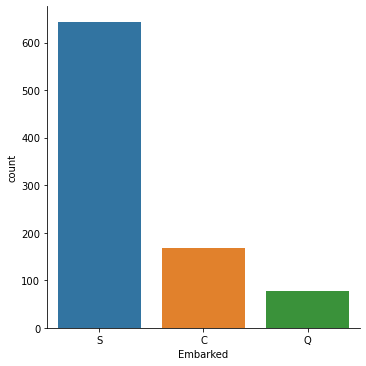

In [64]:
sns.catplot(x='Embarked',kind='count',data=titanic)

In [ ]:
# Southampton seems to be a populated city or the main port for embarkment. Queenstown seems to be the opposite.

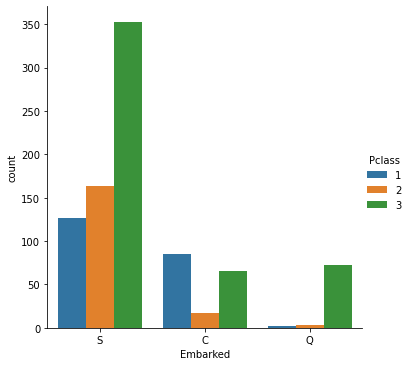

In [65]:
sns.catplot(x='Embarked',kind='count',hue='Pclass',data=titanic)

In [ ]:
# most third class passengers embarked at Southampton. There we very less first class passengers embarked at Queenstown. 
# From this we can infer about the economy of the different cities.